#Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Reading the dataset

In [4]:
df = pd.read_csv('/content/drug200.csv')
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


#Applying label encoding and one hot encoding
#Feature engineering

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Drug'] = le.fit_transform(df['Drug'])

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['BP'] = le.fit_transform(df['BP'])

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
# transforming the column after fitting
enc = enc.fit_transform(df[['Sex']]).toarray()
# converting arrays to a dataframe
encoded_colm = pd.DataFrame(enc)
# concating dataframes
df = pd.concat([df, encoded_colm], axis = 1)
# removing the encoded column.
df = df.drop(['Sex'], axis = 1)
df.head(10)

In [24]:
df.head(10)

,Age,BP,Cholesterol,Na_to_K,Drug,0,1
0,23,0,0,25.355,0,1.0,0.0
1,47,126,0,13.093,3,0.0,1.0
2,47,127,0,10.114,3,0.0,1.0
3,28,128,0,7.798,4,1.0,0.0
4,61,129,0,18.043,0,1.0,0.0
5,22,130,0,8.607,4,1.0,0.0
6,49,131,0,16.275,0,1.0,0.0
7,41,132,0,11.037,3,0.0,1.0
8,60,133,0,15.171,0,0.0,1.0
9,43,134,1,19.368,0,0.0,1.0


#Checking for null/missing values

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   BP           200 non-null    int64  
 2   Cholesterol  200 non-null    int64  
 3   Na_to_K      200 non-null    float64
 4   Drug         200 non-null    int64  
 5   0            200 non-null    float64
 6   1            200 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 11.1 KB


In [30]:
df.isnull().sum()

Age            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
0              0
1              0
dtype: int64

In [45]:
df.describe()

,Age,BP,Cholesterol,Na_to_K,Drug,0,1
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,99.500000,0.485000,16.084485,1.595000,0.480000,0.520000
std,16.544315,57.879185,0.501029,7.223956,1.716305,0.500854,0.500854
min,15.000000,0.000000,0.000000,6.269000,0.000000,0.000000,0.000000
25%,31.000000,49.750000,0.000000,10.445500,0.000000,0.000000,0.000000
50%,45.000000,99.500000,0.000000,13.936500,1.000000,0.000000,1.000000
75%,58.000000,149.250000,1.000000,19.380000,4.000000,1.000000,1.000000
max,74.000000,199.000000,1.000000,38.247000,4.000000,1.000000,1.000000


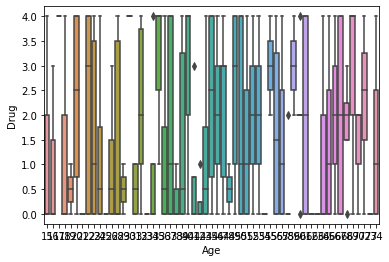

In [46]:
sns.boxplot(x='Age', y='Drug', data=df)

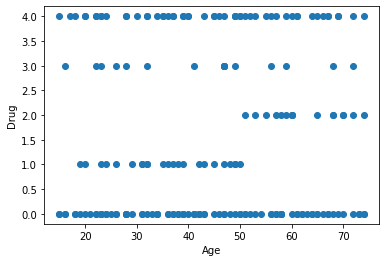

In [47]:
plt.scatter(df['Age'],df['Drug'])
plt.xlabel('Age')
plt.ylabel('Drug')
plt.show()

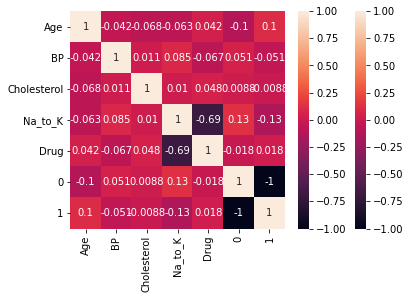

In [48]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
sns.heatmap(correlation_matrix, )
plt.show()

#Initiating the variables

In [26]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#splitting data into training and testing

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
X_train

array([[-0.83405574,  1.00192457,  1.1055416 , -0.74045911,  1.42704996,
         1.03823026],
       [ 0.41196591, -0.46338034, -0.90453403, -0.87126694,  1.42704996,
        -0.96317747],
       [-0.39794817,  0.28714169,  1.1055416 , -0.89684776,  1.42704996,
         1.03823026],
       [-0.77175466,  0.48370698, -0.90453403,  2.39090899, -0.90282753,
         1.03823026],
       [-0.70945358, -0.91011964, -0.90453403,  0.86573941, -0.90282753,
        -0.96317747],
       [ 0.66117024, -0.49911948, -0.90453403, -0.63993343,  0.84458059,
         1.03823026],
       [-0.02414167,  0.12631554, -0.90453403,  0.24281204, -0.90282753,
        -0.96317747],
       [-0.83405574,  0.84109842,  1.1055416 ,  1.35218969, -0.90282753,
         1.03823026],
       [ 1.78258973, -1.42833723,  1.1055416 , -0.10494874, -0.90282753,
        -0.96317747],
       [ 0.34966483,  1.12701157, -0.90453403, -0.35923585,  1.42704996,
         1.03823026],
       [-1.58166873, -1.05307622,  1.1055416 , -0.

#Training the model using KNN Algorithm

In [33]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#Testing the model

In [35]:
y_pred = classifier.predict(X_test)
y_pred

array([1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 0.])

#Checking for accuracy

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)*100

[[19  0]
 [ 0 21]]


100.0

#Prediction for new values

In [42]:
output= classifier.predict(sc.transform([[47,127,0,10.114,3,1]]))
output

array([1.])

In [43]:
output= classifier.predict(sc.transform([[30,222,2,6.554,5,1]]))
output

array([1.])

In [44]:
output= classifier.predict(sc.transform([[22,444,1,4.113,2,1]]))
output

array([0.])